# Zudio Project

## Easy Level (Basic Analysis)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### Load The Data

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\Zudio_Data.csv")
df

,Store,Country,State,City,Category,Clothing_Type,Store_Number,Postal_Code,Store_Type,Store_Open_Date,...,Security_Features,Order_ID,Order_Date,Month,Customer_ID,Customer_Name,Product_ID,Price,Quantity,Sales_Profit
0,Zudio,India,Karnataka,Jalna,Women,Dresses,30,411084,Owned,04-06-2022,...,Alarm,88240,06-11-2024,November,233084,Michele Ochoa,354,1958,5,3916.0
1,Zudio,India,Gujarat,Patna,Kids,Skirts,48,404562,Owned,19-12-2020,...,Alarm,78145,17-06-2024,June,926472,Daniel Jimenez,741,2078,1,831.2
2,Zudio,India,Uttar Pradesh,Kolkata,Men,Hoodies,97,437773,Rented,04-09-2023,...,CCTV,33363,17-08-2024,August,853255,Steven Davis,607,1445,2,1156.0
3,Zudio,India,West Bengal,Kolkata,Women,Dresses,93,431725,Owned,11-04-2024,...,CCTV,46682,27-03-2024,March,106146,Derek Orozco,991,2469,6,5925.6
4,Zudio,India,West Bengal,Guwahati,Men,Dresses,51,415370,Owned,29-05-2022,...,"CCTV, Alarm",58242,08-04-2024,April,264070,Victor Arnold,479,1105,6,2652.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7894,Zudio,India,Uttar Pradesh,Chandigarh,Kids,Jeans,32,431437,Owned,24-04-2024,...,"CCTV, Alarm",39056,27-09-2024,September,591993,Tracey Andrews,262,2838,1,1135.2
7895,Zudio,India,Uttar Pradesh,Aurangabad,Kids,Jackets,52,424643,Owned,03-02-2024,...,Alarm,85486,16-03-2024,March,822244,Linda Wallace,537,1814,2,1451.2
7896,Zudio,India,Tamil Nadu,Pune,Kids,T-shirts,81,412057,Owned,11-04-2021,...,"CCTV, Alarm",78200,02-12-2024,December,268376,Brandon Baker,457,1961,1,784.4
7897,Zudio,India,Delhi,Madurai,Men,Shoes,58,405203,Rented,17-06-2022,...,CCTV,19883,29-07-2024,July,766283,John Lewis,608,1017,8,3254.4


### Q1. Analyze Order Distribution by State

In [3]:
Store_Distribution = df.groupby('State')['Order_ID'].count().reset_index()
Store_Distribution.columns = ['State','Total_Orders']
Store_Distribution = Store_Distribution.sort_values(by='Total_Orders',ascending = False)
Store_Distribution

,State,Total_Orders
4,Rajasthan,1013
0,Delhi,1011
6,Uttar Pradesh,1011
1,Gujarat,982
7,West Bengal,982
3,Maharashtra,975
2,Karnataka,963
5,Tamil Nadu,962


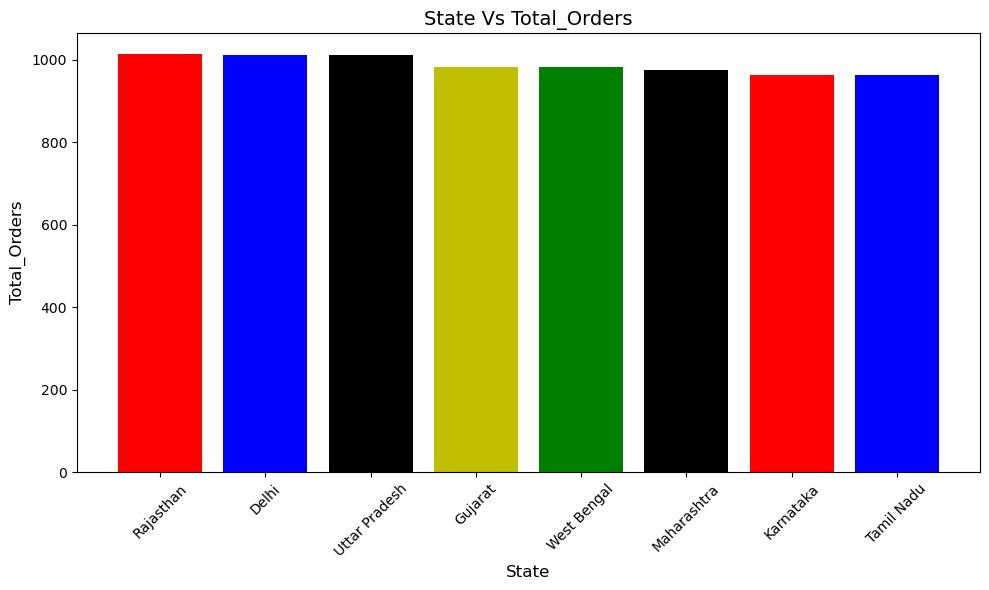

In [4]:
plt.figure(figsize = (10,6))
plt.bar(Store_Distribution['State'],Store_Distribution['Total_Orders'],color=('r','b','k','y','g','k','r','b'))
plt.title('State Vs Total_Orders',fontsize = 14)
plt.xlabel('State',fontsize = 12)
plt.ylabel('Total_Orders',fontsize = 12)
plt.xticks(rotation = 45 ,fontsize =10)
plt.tight_layout()
plt.show()

###### Conclusion:- Rajasthan has Highest Orders 

### Q2.Top 5 Products by Total Sales Profit

In [5]:
Products = df.groupby('Clothing_Type')['Sales_Profit'].sum().reset_index()
Products.columns = ['Products','Total_Profit']
Top_Products = Products.sort_values(by = 'Total_Profit',ascending = False).head(5)
Top_Products

,Products,Total_Profit
0,Dresses,2373512.4
7,Skirts,2320703.2
4,Pants,2316501.2
8,Sweaters,2315042.8
2,Jackets,2304795.6


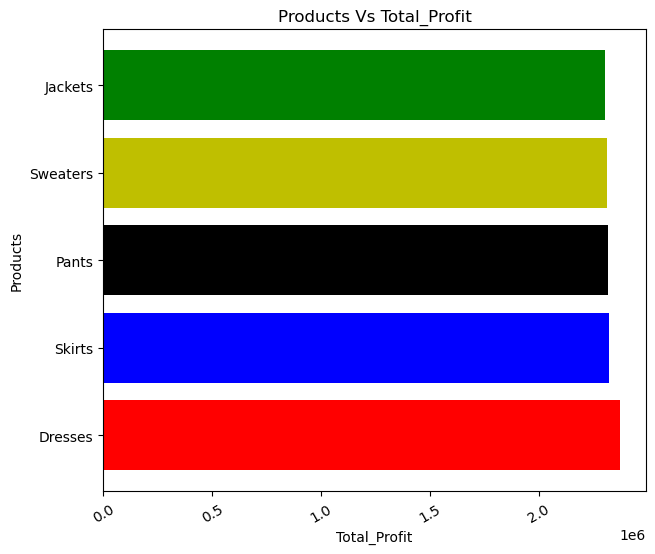

In [6]:
plt.figure(figsize=(7,6))
plt.barh(Top_Products['Products'],Top_Products['Total_Profit'],color = ('r','b','k','y','g'))
plt.title('Products Vs Total_Profit')
plt.xlabel('Total_Profit')
plt.ylabel('Products')
plt.xticks(rotation = 30 ,fontsize = 10)
plt.show()

###### Colclusion:- Dresses has Highest Sales_Profit

### Q3. Monthly Orders Count

In [7]:
Orders = df.groupby('Month')['Order_ID'].count().reset_index()
Orders.columns = ['Month', 'Total_Orders']
Orders = Orders.sort_values(by='Total_Orders',ascending = False)
Orders

,Month,Total_Orders
10,October,743
7,March,733
9,November,729
1,August,724
8,May,721
0,April,719
4,January,706
5,July,697
6,June,695
3,February,689


C:\Users\DELL\AppData\Local\Temp\ipykernel_18388\2541334822.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="Month",y="Total_Orders",data=Orders,palette='spring')


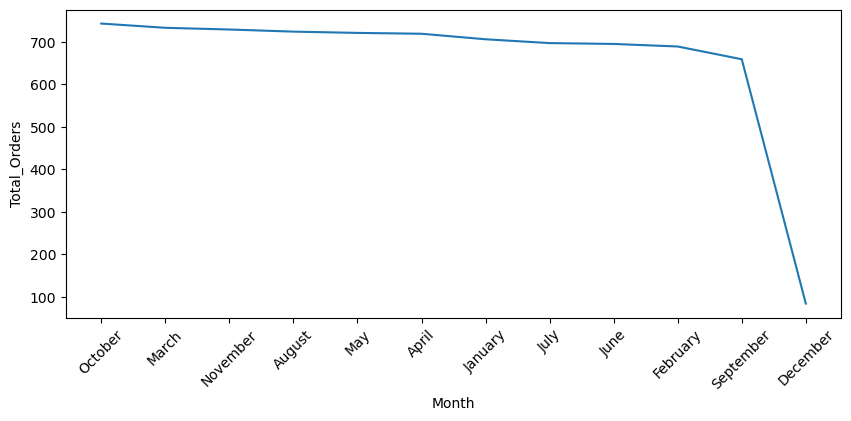

In [8]:
plt.figure(figsize = (10,4))
sns.lineplot(x="Month",y="Total_Orders",data=Orders,palette='spring')
plt.xticks(rotation = 45)
plt.show()

###### Conclusion :- October has Highest Orders


### Q4.Store Type vs. Product Sales

In [9]:
Store = df.groupby('Store_Type')['Product_ID'].count().reset_index()
Store.columns = ['Store_Type','Total_Product_Sell']
Store = Store.sort_values(by='Total_Product_Sell',ascending=False)
Store

,Store_Type,Total_Product_Sell
1,Rented,3974
0,Owned,3925


([<matplotlib.patches.Wedge at 0x1ae47e3e710>,
 [Text(-1.0999477791774008, -0.01071835261148518, 'Rented'),
  Text(1.0999477791774008, 0.010718352611485045, 'Owned')],
 [Text(-0.5999715159149458, -0.005846374151719189, '50.3%'),
  Text(0.5999715159149458, 0.005846374151719115, '49.7%')])

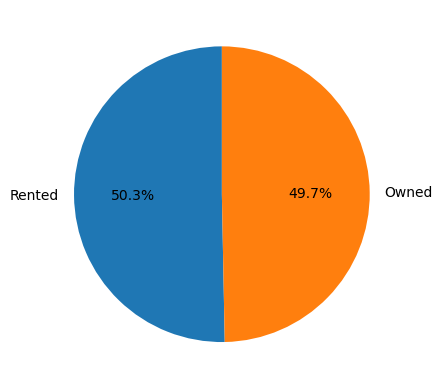

In [10]:
labels = Store['Store_Type']
sizes = Store['Total_Product_Sell']
plt.pie(sizes,labels=labels,autopct='%1.1f%%', startangle=90)

###### Conclusion :- Rented Store has little bit high products sales than the Owned Store

### Q5.Most Sold Clothing Category

In [11]:
Clothing_Category = df.groupby('Category')['Quantity'].sum().reset_index()
Clothing_Category.columns =  ['Clothing_Category','Most_Sold']
Clothing_Category = Clothing_Category.sort_values(by='Most_Sold',ascending = False)
Clothing_Category

,Clothing_Category,Most_Sold
0,Kids,12013
2,Women,11959
1,Men,11727


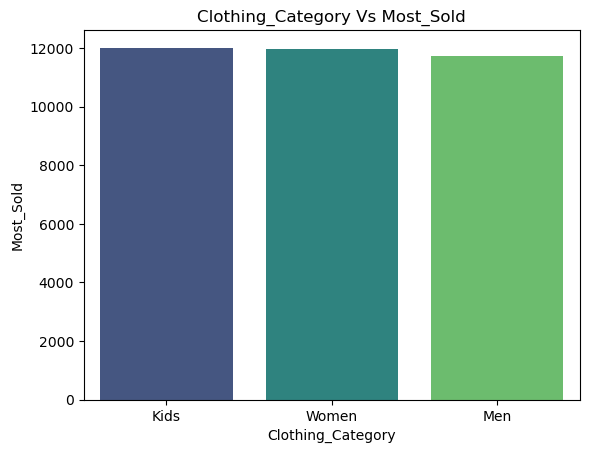

In [12]:
sns.barplot(x='Clothing_Category',y='Most_Sold',data=Clothing_Category,palette='viridis')
plt.title('Clothing_Category Vs Most_Sold')
plt.xlabel('Clothing_Category')
plt.ylabel('Most_Sold')
plt.show()

###### Conclusion:- Kid`s Clothes are the most sold Clothing_Category

## Moderate/Advance Level (Intermediate Analysis)

### Q1.Average Profit Margin by Clothing Type

In [13]:
Avg_profit = df.groupby('Clothing_Type')['Sales_Profit'].mean().reset_index()
Avg_profit.columns = ['Clothing_Type','Avg_Profit']
Avg_profit = Avg_profit.sort_values(by='Avg_Profit',ascending = False)
Avg_profit

,Clothing_Type,Avg_Profit
8,Sweaters,3307.204000
1,Hoodies,3252.578409
5,Shirts,3250.166572
4,Pants,3212.900416
7,Skirts,3196.560882
0,Dresses,3173.144920
2,Jackets,3135.776327
3,Jeans,3134.252991
9,T-shirts,3099.529796
10,Tops,3060.394460


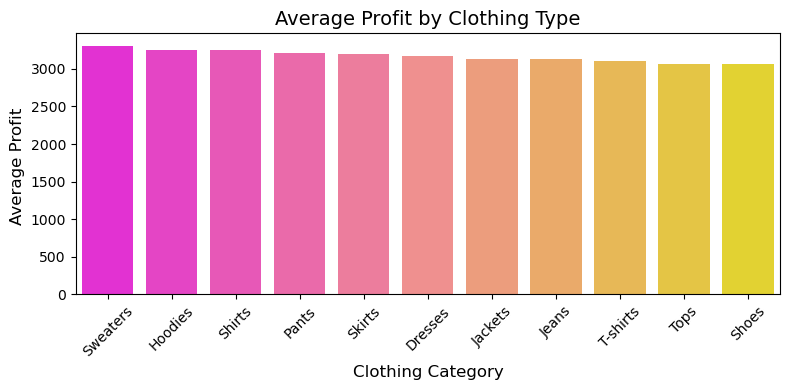

In [14]:
plt.figure(figsize=(8,4))
sns.barplot(x= 'Clothing_Type',y= 'Avg_Profit',data = Avg_profit , palette = 'spring')
plt.xlabel('Clothing Category', fontsize=12)
plt.ylabel('Average Profit ', fontsize=12)
plt.title('Average Profit by Clothing Type', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

###### Conclusion :- Sweaters has highest profit Margin

### Q2.Top 3 Customers by Highest Profit

In [15]:
Customers  = df.groupby('Customer_Name')['Sales_Profit'].sum().reset_index()
Customers.columns = ['Customer_Name','Total_Profit']
Customers = Customers.sort_values(by='Total_Profit',ascending = False).head(3)
Customers

,Customer_Name,Total_Profit
3503,Jonathan Brown,20990.4
1440,Christopher Smith,20565.2
5164,Michael Williams,19524.0


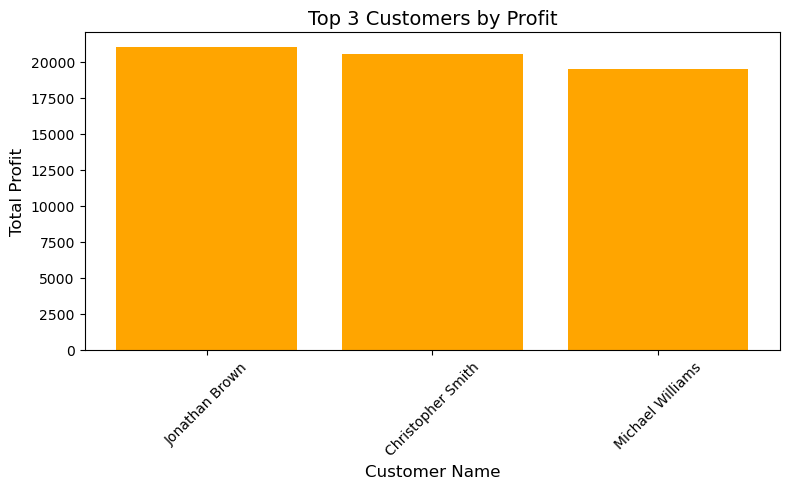

In [16]:
plt.figure(figsize=(8, 5))
plt.bar(Customers['Customer_Name'], Customers['Total_Profit'], color='orange')
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.title('Top 3 Customers by Profit', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


###### Conclusion :- Jonathan Brown ,Christopher Smith and Michael Williams are top 3 Customers with their highest profit

### Q3. Total Quantity Sold by City

In [17]:
City  = df.groupby('City')['Quantity'].sum().reset_index()
City.columns = ['City','Total_Sales']
City = City.sort_values(by='Total_Sales',ascending = False)
City

,City,Total_Sales
15,Jalna,975
20,Kolkata,968
12,Hyderabad,940
28,New Delhi,936
25,Mysuru,932
4,Bhopal,921
16,Jammu,921
33,Rajkot,912
22,Madurai,898
21,Lucknow,896


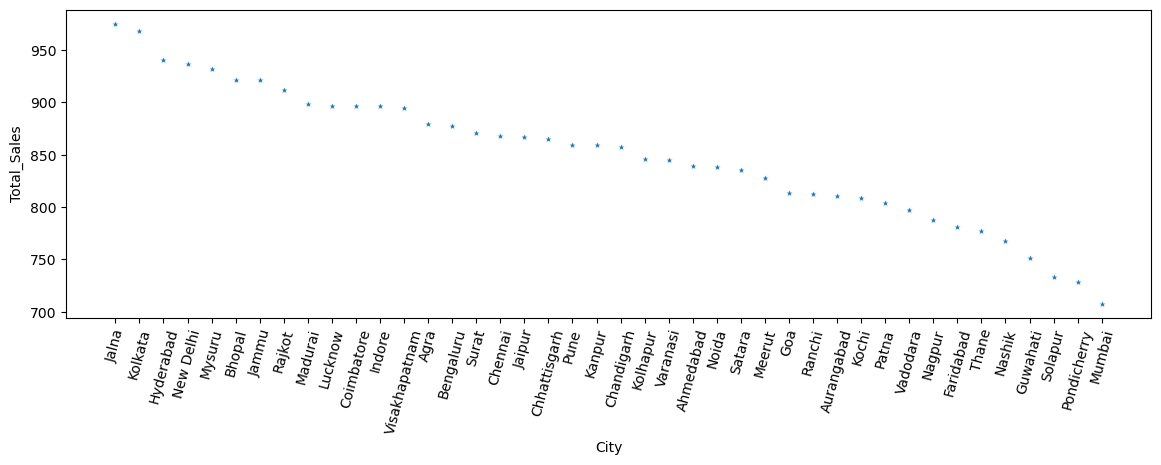

In [18]:
plt.figure(figsize = (14,4))
sns.scatterplot(x='City',y='Total_Sales',data=City,marker = '*', alpha = 1)
plt.xticks(rotation = 75 , fontsize = 10)
plt.show()

###### Conclusion :- Jalna has Highest Quantity Sold

### Q4. Percentage of Total Sales by Operating_Hours

In [19]:
total_sales = df.groupby('Operating_Hours')['Quantity'].sum().reset_index()
total_sales.columns = ['Operating_Hours','Total_Sales']
total_sales = total_sales.sort_values(by='Total_Sales',ascending = False)
total_sales

,Operating_Hours,Total_Sales
0,10 AM - 7 PM,9206
3,9 AM - 8 PM,9008
2,11 AM - 8 PM,8895
1,10 AM - 9 PM,8590


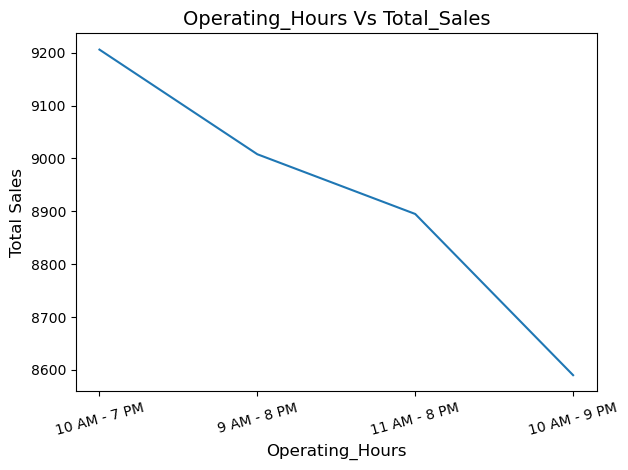

In [20]:
sns.lineplot(x='Operating_Hours',y='Total_Sales',data = total_sales)
plt.xlabel('Operating_Hours', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Operating_Hours Vs Total_Sales', fontsize=14)
plt.xticks(rotation=15, fontsize=10)
plt.tight_layout()
plt.show()

###### Conclusion :- 10 AM - 7 PM has the most Sales

### Q5.State with Highest Sales Profit per Square Foot

In [21]:
df['Profit_per_SqFt'] = df['Sales_Profit'] / df['Selling_Area_Size(sq ft)']
state_sales = df.groupby('State')['Profit_per_SqFt'].mean().reset_index()
state_sales.columns = ['State','Profit_per_SqFt']
highest_state = state_sales.loc[state_sales['Profit_per_SqFt'].idxmax()]
highest_state

State              West Bengal
Profit_per_SqFt       3.017413
Name: 7, dtype: object

In [22]:
state_sales

,State,Profit_per_SqFt
0,Delhi,2.916669
1,Gujarat,2.893404
2,Karnataka,2.968868
3,Maharashtra,2.947085
4,Rajasthan,2.951749
5,Tamil Nadu,2.979801
6,Uttar Pradesh,2.923685
7,West Bengal,3.017413


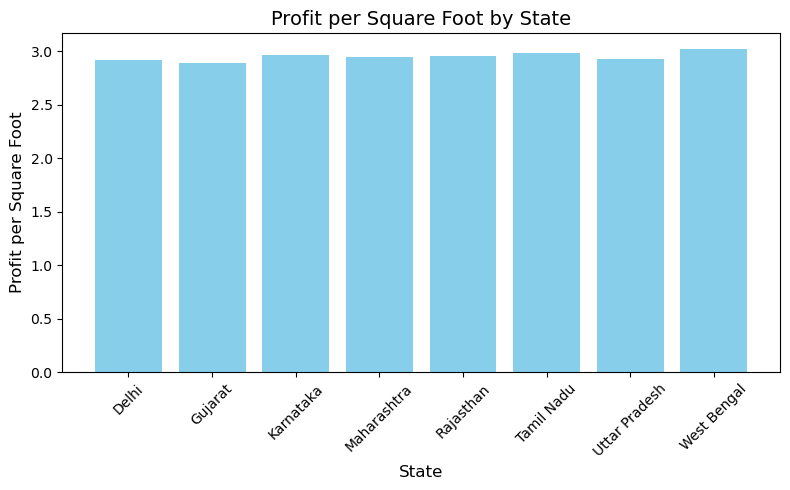

In [23]:
plt.figure(figsize=(8, 5))
plt.bar(state_sales['State'], state_sales['Profit_per_SqFt'], color='skyblue')
plt.xlabel('State', fontsize=12)
plt.ylabel('Profit per Square Foot', fontsize=12)
plt.title('Profit per Square Foot by State', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

###### Conclusion:- West Bengal has Profit per Square Foot

### Q6. Sales Quantity Anomalies Detection

In [24]:
city_stats = df.groupby('City')['Quantity'].agg(['mean', 'std']).reset_index()
city_stats.rename(columns={'mean': 'City_Avg_Sales', 'std': 'City_Sales_Std'}, inplace=True)
df = pd.merge(df, city_stats, on='City')
df['Z_Score'] = (df['Quantity'] - df['City_Avg_Sales']) / df['City_Sales_Std']
threshold = 2
df['Anomaly'] = np.abs(df['Z_Score']) > threshold
df


,Store,Country,State,City,Category,Clothing_Type,Store_Number,Postal_Code,Store_Type,Store_Open_Date,...,Customer_Name,Product_ID,Price,Quantity,Sales_Profit,Profit_per_SqFt,City_Avg_Sales,City_Sales_Std,Z_Score,Anomaly
0,Zudio,India,Karnataka,Jalna,Women,Dresses,30,411084,Owned,04-06-2022,...,Michele Ochoa,354,1958,5,3916.0,4.122105,4.899497,2.315942,0.043396,False
1,Zudio,India,Maharashtra,Jalna,Women,Hoodies,62,437619,Rented,30-03-2020,...,Morgan Gonzales,512,1089,2,871.2,1.089000,4.899497,2.315942,-1.251973,False
2,Zudio,India,Delhi,Jalna,Women,Pants,79,403160,Owned,16-11-2024,...,Diana Allen MD,674,1331,3,1597.2,1.331000,4.899497,2.315942,-0.820184,False
3,Zudio,India,Rajasthan,Jalna,Women,Jeans,4,410819,Owned,02-10-2021,...,John Jordan,718,2074,4,3318.4,3.493053,4.899497,2.315942,-0.388394,False
4,Zudio,India,Gujarat,Jalna,Men,Jackets,82,402992,Rented,18-04-2022,...,Lori Richardson,662,2950,4,4720.0,3.630769,4.899497,2.315942,-0.388394,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7894,Zudio,India,Gujarat,Coimbatore,Kids,Pants,48,424793,Rented,07-06-2020,...,Erin Allen,953,2804,5,5608.0,4.005714,4.502513,2.282729,0.217935,False
7895,Zudio,India,Delhi,Coimbatore,Kids,Jackets,88,423615,Rented,18-01-2022,...,Morgan Adams,995,1968,4,3148.8,3.936000,4.502513,2.282729,-0.220137,False
7896,Zudio,India,Karnataka,Coimbatore,Kids,Hoodies,19,404400,Owned,31-08-2022,...,Samantha Chase,843,2735,5,5470.0,3.907143,4.502513,2.282729,0.217935,False
7897,Zudio,India,Karnataka,Coimbatore,Kids,Hoodies,85,418811,Rented,19-05-2022,...,Jacob Walters,948,2860,8,9152.0,9.633684,4.502513,2.282729,1.532152,False


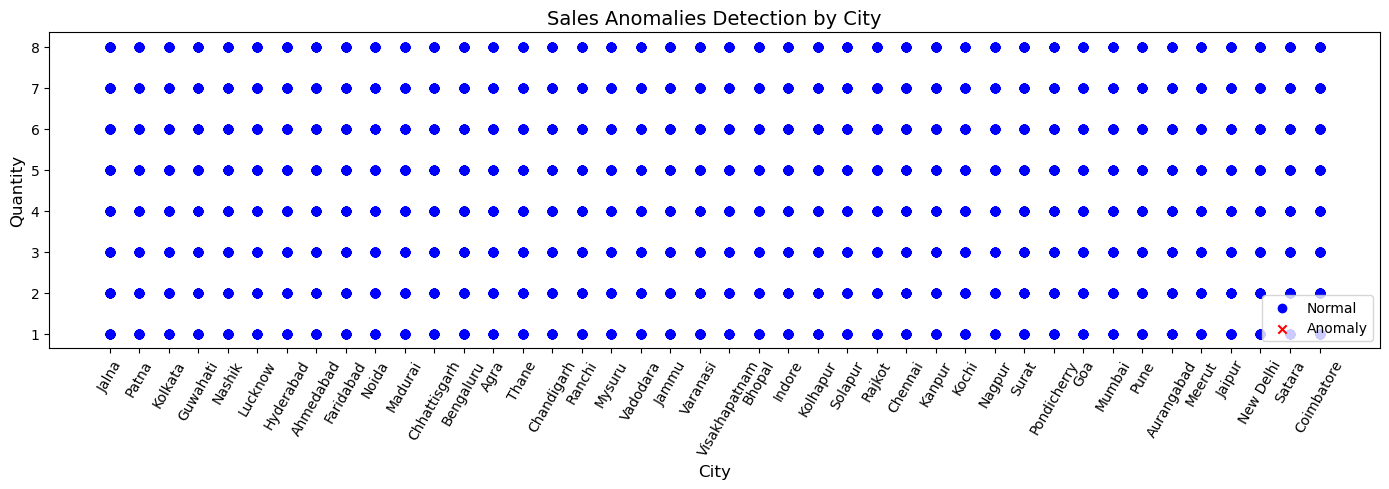

In [25]:
normal_data = df[df['Anomaly'] == False]
anomaly_data = df[df['Anomaly'] == True]
plt.figure(figsize=(14, 5))
plt.scatter(normal_data['City'], normal_data['Quantity'], label='Normal', color='blue')
plt.scatter(anomaly_data['City'], anomaly_data['Quantity'], label='Anomaly', color='red', marker='x')
plt.xlabel('City', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.title('Sales Anomalies Detection by City', fontsize=14)
plt.legend()
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()


### Another Example on Anomaly Detection

In [26]:
data = {
    'City': ['New York', 'New York', 'Los Angeles', 'Los Angeles', 'Chicago', 'Chicago'],
    'Store_Name': ['Store A', 'Store B', 'Store C', 'Store D', 'Store E', 'Store F'],
    'Total_Sales': [150000, 120000, 300000, 500000, 200000, 100000]
}

df = pd.DataFrame(data)
df

,City,Store_Name,Total_Sales
0,New York,Store A,150000
1,New York,Store B,120000
2,Los Angeles,Store C,300000
3,Los Angeles,Store D,500000
4,Chicago,Store E,200000
5,Chicago,Store F,100000


In [27]:
city_stats = df.groupby('City')['Total_Sales'].agg(['mean', 'std']).reset_index()
city_stats.rename(columns={'mean': 'City_Avg_Sales', 'std': 'City_Sales_Std'}, inplace=True)
df = pd.merge(df, city_stats, on='City')
df['Z_Score'] = (df['Total_Sales'] - df['City_Avg_Sales']) / df['City_Sales_Std']
threshold = 2
df['Anomaly'] = np.abs(df['Z_Score']) > threshold
df

,City,Store_Name,Total_Sales,City_Avg_Sales,City_Sales_Std,Z_Score,Anomaly
0,New York,Store A,150000,135000.0,21213.203436,0.707107,False
1,New York,Store B,120000,135000.0,21213.203436,-0.707107,False
2,Los Angeles,Store C,300000,400000.0,141421.356237,-0.707107,False
3,Los Angeles,Store D,500000,400000.0,141421.356237,0.707107,False
4,Chicago,Store E,200000,150000.0,70710.678119,0.707107,False
5,Chicago,Store F,100000,150000.0,70710.678119,-0.707107,False


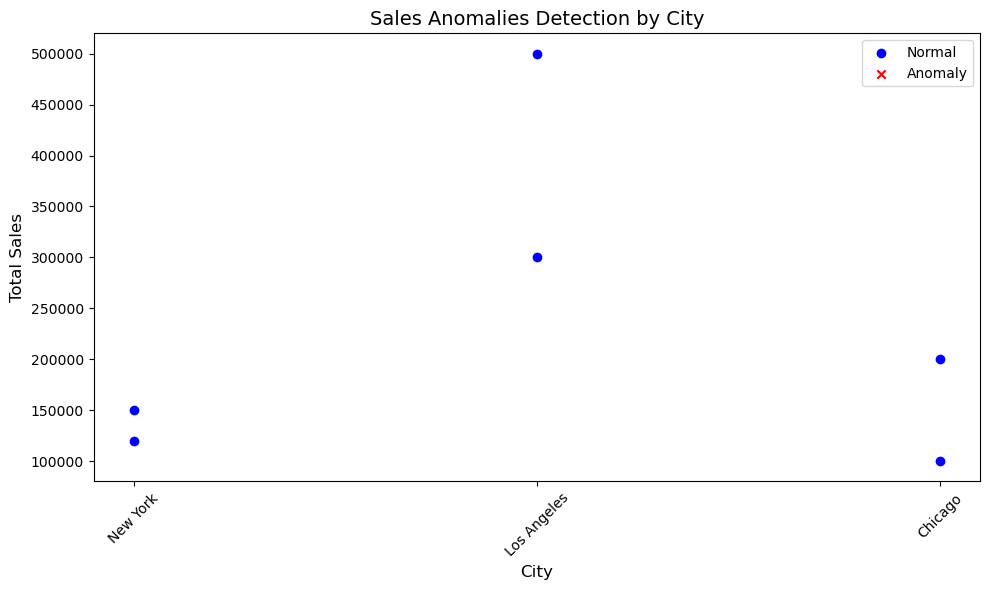

In [28]:
normal_data = df[df['Anomaly'] == False]
anomaly_data = df[df['Anomaly'] == True]
plt.figure(figsize=(10, 6))
plt.scatter(normal_data['City'], normal_data['Total_Sales'], label='Normal', color='blue')
plt.scatter(anomaly_data['City'], anomaly_data['Total_Sales'], label='Anomaly', color='red', marker='x')
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Sales Anomalies Detection by City', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Insights :- 
    
   ###### 1. State - Rajasthan has Highest Orders 
   ###### 2. Clothing Type - Dresses has Highest Sales_Profit
   ###### 3. Month - October has Highest Orders
   ###### 4. Store Type - Rented Store has little bit high products sales than the Owned Store
   ###### 5. Clothing Category - Kids Clothes are the most sold Clothing_Category
   ###### 6. Profit Margin - Sweaters has highest profit Margin
   ###### 7. Top 3 Customers  - Jonathan Brown ,Christopher Smith and Michael Williams are top 3 Customers with their highest profit
   ###### 8. City - Jalna has Highest Quantity Sold
   ###### 9. Operating Hours - 10 AM - 7 PM has the most Sales
   ###### 10. State - West Bengal has Profit per Square Foot